# Volume 4: Spectral 2
    Daniel Perkins
    MATH 438
    1/11/25

In [12]:
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import barycentric_interpolate

# Sample Code

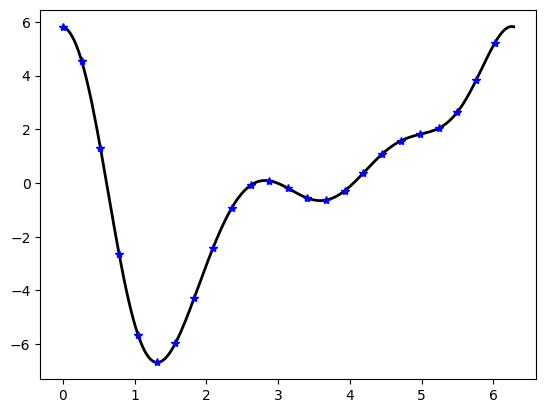

In [4]:
N=24
x1 = (2.*np.pi/N)*np.arange(N)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0) ))

# Approximates the derivative using the pseudospectral method
f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fp = np.real(ifft(fp_hat))

# Calculates the derivative analytically
x2 = np.linspace(0,2*np.pi,200)
derivative = (2.*np.sin(x2)*np.cos(x2)**2. -
            np.sin(x2)**3. +
            2*np.cos(x2+1)*np.exp(2*np.sin(x2+1))
            )

plt.plot(x2,derivative,'-k',linewidth=2.)
plt.plot(x1, fp,'*b')
plt.show()

# Problem 1

Create a function
that approximates 1/2u'' − u' on the Fourier grid points for N = 24.

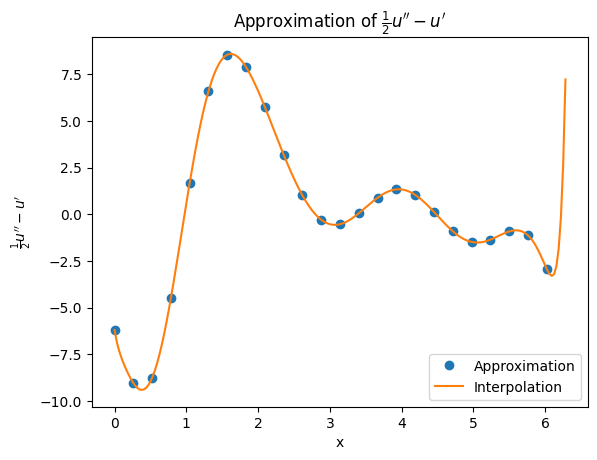

In [15]:
N=24
x1 = (2.*np.pi/N)*np.arange(N)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0) ))

# Approximate the derivative using the pseudospectral method
f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fp = np.real(ifft(fp_hat))

# Approximate the second derivative
f2_hat = fft(fp)
fp2_hat = ((1j*k)*f2_hat)
fp2 = np.real(ifft(fp2_hat))

approximation = (1/2)*fp2 - fp
Interpolation = barycentric_interpolate(x1, approximation, np.linspace(0, 2*np.pi, 200))


plt.plot(x1, approximation,'o', label="Approximation")
plt.plot(np.linspace(0, 2*np.pi, 200), Interpolation, label="Interpolation")
plt.title(r"Approximation of $\frac{1}{2}u''-u'$")
plt.xlabel("x")
plt.ylabel(r"$\frac{1}{2}u''-u'$")
plt.legend()
plt.show()

# Problem 2 
Using a solve_ivp, solve the initial value problem. 
Plot your numerical solution from
t = 0 to t = 8 over 250 time steps and 200 x steps. Note that the initial data is nearly zero
near x = 0 and 2π, and so we can use the pseudospectral method. a Use the following code to
help graph.

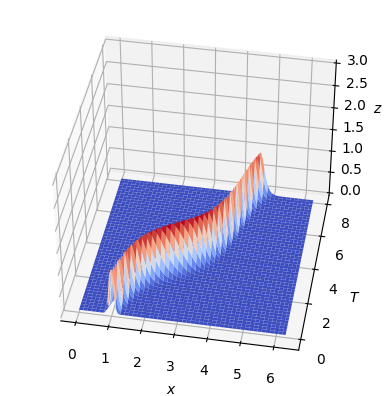

In [55]:
t_steps = 250
x_steps = 200

'''
Your code here to set things up
'''
# Set up line spaces
x_domain = np.linspace(0, 2*np.pi, x_steps)
t_domain = np.linspace(0, 8, t_steps)
c = 0.2 + np.sin(x_domain - 1)**2
u0 = np.exp(-100*(x_domain-1)**2)

# FFT part to get u_x
k = np.concatenate(( np.arange(0,x_steps/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-x_steps/2+1,0) ))
def ux(f):    
    f_hat = fft(f)
    fp_hat = ((1j*k)*f_hat)
    fp = np.real(ifft(fp_hat))
    return fp

# Define the ODE
def ode(t, u):
    u_x = ux(u)
    return -c*u_x

# Solve the ODE
sol = solve_ivp(ode, [t_domain[0], t_domain[-1]], u0, t_eval=t_domain)

X,Y = np.meshgrid(x_domain, t_domain)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(X,Y,np.transpose(sol.y),cmap='coolwarm')
ax.set_zlim(0,3)
ax.view_init(elev=40, azim=280)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$T$')
ax.set_zlabel(r'$z$')
plt.show()

# Problem 3
Using a solve_ivp, solve the initial value problem. 
Plot your numerical solution from
t = 0 to t = 3 over 150 time steps and 100 x steps. Note that the initial data is nearly zero
near x = 0 and 2π, and so we can use the pseudospectral method. a Use the following code to
help graph.

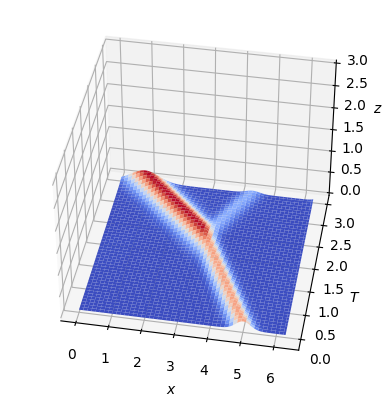

In [54]:
t_steps = 150
x_steps = 100

'''
Your code here to set things up
'''
# Set up line spaces
x_domain = np.linspace(0, 2*np.pi, x_steps)
t_domain = np.linspace(0, 3, t_steps)
c = np.array([4 if 0<=x<np.pi else 1 for x in x_domain])
u0 = 0.2*np.exp(-10*(x_domain-5)**2)
ut0 = -4*(x_domain-5)*np.exp(-10*(x_domain-5)**2)

# FFT part to get u_x and u_xx
k = np.concatenate(( np.arange(0,x_steps/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-x_steps/2+1,0) ))
def ux(f):    
    f_hat = fft(f)
    fp_hat = ((1j*k)*f_hat)
    fp = np.real(ifft(fp_hat))
    return fp
def uxx(f):
    fp = ux(f)
    f2_hat = fft(fp)
    fp2_hat = ((1j*k)*f2_hat)
    fp2 = np.real(ifft(fp2_hat))
    return fp2
    
# Define the ODE
def ode(t, u):
    u_0 = u[:x_steps]  # u
    u_1 = u[x_steps:]  # u_t
    u_xx = uxx(u_0)
    output = np.concatenate([u_1, c*u_xx])  # Needs to be flattened to work
    return output

# Solve the ODE
initial_conditions = np.concatenate([u0, ut0]) # Need to flatten it so that it works
sol = solve_ivp(ode, [t_domain[0], t_domain[-1]], initial_conditions, t_eval=t_domain)

X,Y = np.meshgrid(x_domain, t_domain)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
# I added [:x_steps] to the line below since the output was flattened
surf = ax.plot_surface(X,Y,np.transpose(sol.y[:x_steps]),cmap='coolwarm')
ax.set_zlim(0,3)
ax.view_init(elev=40, azim=280)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$T$')
ax.set_zlabel(r'$z$')
plt.show()